In [51]:
import pandas as pd
import numpy as np
import math

In [52]:
global_data = pd.read_csv('./data/global_data.csv')
global_data.drop('Unnamed: 0', axis=1, inplace=True)
global_data

,dt,mean_temp
0,1900,20.571300
1,1901,21.928121
2,1902,21.360850
3,1903,21.650719
4,1904,21.196928
...,...,...
109,2009,20.373753
110,2010,20.390901
111,2011,20.387350
112,2012,20.834057


In [53]:
global_data['mean_temp'][0:0]

Series([], Name: mean_temp, dtype: float64)

In [54]:
global_temp_1 = []
global_temp = global_data['mean_temp']
for i in range(len(global_temp)):
    global_temp_1.append(global_temp[:i+1].sum())

global_temp_1 = np.array(global_temp_1)

In [55]:
global_temp_1

array([  20.5713    ,   42.49942093,   63.86027053,   85.5109899 ,
        106.70791747,  128.23239334,  149.27574524,  170.02513557,
        191.34637988,  212.33355813,  233.24730614,  254.2122129 ,
        275.17083947,  295.94271156,  317.05291   ,  338.29618748,
        359.46092251,  380.38576887,  401.10879301,  422.35348199,
        443.59642283,  464.55005847,  485.61324973,  506.25638968,
        527.00531045,  547.78273216,  568.34881509,  588.89056891,
        609.64474014,  630.11496159,  650.58991851,  671.18019923,
        692.03978927,  712.65553225,  733.40708054,  753.96057528,
        774.49253483,  795.13478168,  815.47006704,  835.86731519,
        855.84989625,  876.15890683,  896.31318664,  916.67450173,
        937.00777251,  957.08575118,  977.59854652,  998.08829709,
       1018.38574083, 1038.68147523, 1058.68717158, 1078.89414443,
       1098.83979339, 1118.8453053 , 1138.77004558, 1158.64055152,
       1178.47257509, 1198.740161  , 1219.04878913, 1239.29835

In [56]:
global_temp

0      20.571300
1      21.928121
2      21.360850
3      21.650719
4      21.196928
         ...    
109    20.373753
110    20.390901
111    20.387350
112    20.834057
113    22.115738
Name: mean_temp, Length: 114, dtype: float64

In [57]:
sita_global = []
for i in range(len(global_temp_1)):
    if i+1 < len(global_temp_1):
        sita_global.append(global_temp_1[i+1] / global_temp_1[i])
    
sita_global = np.array(sita_global)
rou_global = sita_global - 1

In [58]:
rouglobal_df = pd.DataFrame(columns=['rou'])
rouglobal_df['rou'] = rou_global
rou_need = rouglobal_df.loc[rouglobal_df['rou']<0.5]
num = rou_need.shape

In [59]:
k = num[0] / len(rouglobal_df)
k

0.9823008849557522

**光滑比高达98.23%**， 说明此问题非常适合使用灰度预测

In [60]:
delta = 0.5
global_temp_z1 = []
for i in range(len(global_temp_1)):
    if i+1 < len(global_temp_1):
        temp = delta*global_temp_1[i+1] + (1-delta)*global_temp_1[i]
        global_temp_z1.append(temp)

global_temp_z1 = np.array(global_temp_z1)

In [61]:
Y = global_temp[1:].to_numpy().reshape(-1, 1)
temp = np.ones(len(global_temp_z1)).reshape(-1, 1)
global_temp_z1 = global_temp_z1.reshape(-1, 1)
B = np.concatenate((-global_temp_z1, temp), axis=1)

In [62]:
u = np.linalg.inv(np.matmul(B.T, B))
u = np.matmul(u, B.T)
u = np.matmul(u, Y)
u
a_hat = u[0][0]
b_hat = u[1][0]

In [76]:
b_hat

20.953610345287963

In [63]:
def predict_global_1hat(a, b, x0, m):
    return (x0[0] - b/a)*np.exp(-a*m) + b/a

def predict_global_0hat(a, b, x0, m):
    return predict_global_1hat(a, b, x0, m+1) - predict_global_1hat(a, b, x0, m)

In [64]:
global_0hat = []
epsilon = []
epsilon_absolute = []
for i in range(len(global_temp)):
    if i+1 < len(global_temp):
        temp = predict_global_0hat(a_hat, b_hat, global_temp, i+1)
        global_0hat.append(temp)
        epsilon.append(global_temp[i+1] - temp)
        epsilon_absolute.append(np.absolute(global_temp[i+1] - temp) * 100 / global_temp[i+1])
epsilon
epsilon_absolute

[4.567571014179075,
 2.08422729160927,
 3.445475477672705,
 1.4297570279600897,
 2.9802971228621815,
 0.8137684326311583,
 0.539043628013786,
 2.208450769208951,
 0.7035769289197531,
 0.4068274377447659,
 0.7015921480537408,
 0.7235627161424473,
 0.11684287908285897,
 1.5389977553979202,
 2.2067614780611406,
 1.8949649325966649,
 0.821933427158023,
 0.09181510016961741,
 2.4167893271972876,
 2.4595795043224027,
 1.1643420403605216,
 1.7296151832236277,
 0.21779745882255797,
 0.3450488102018721,
 0.5335722487297784,
 0.4362237552770871,
 0.5028136956897453,
 0.5776263222916516,
 0.7490047435682778,
 0.6732505792231787,
 0.05725935562769505,
 1.2859695424656254,
 0.1703739299138342,
 0.8753394855226589,
 0.027709582554117967,
 0.08048081766315732,
 0.5060670710916496,
 0.9432020944667735,
 0.5841502413529314,
 2.617948928142773,
 0.9159771792458777,
 1.6377856402678632,
 0.551935812700634,
 0.6381858231825046,
 1.8647297055867338,
 0.34645296453333296,
 0.28632579561826366,
 0.6059871998

In [65]:
pre = []
for i in range(len(global_temp)+100):
    temp = predict_global_0hat(a_hat, b_hat, global_temp, i+1)
    pre.append(temp)

pre = np.array(pre)
pre.shape

(214,)

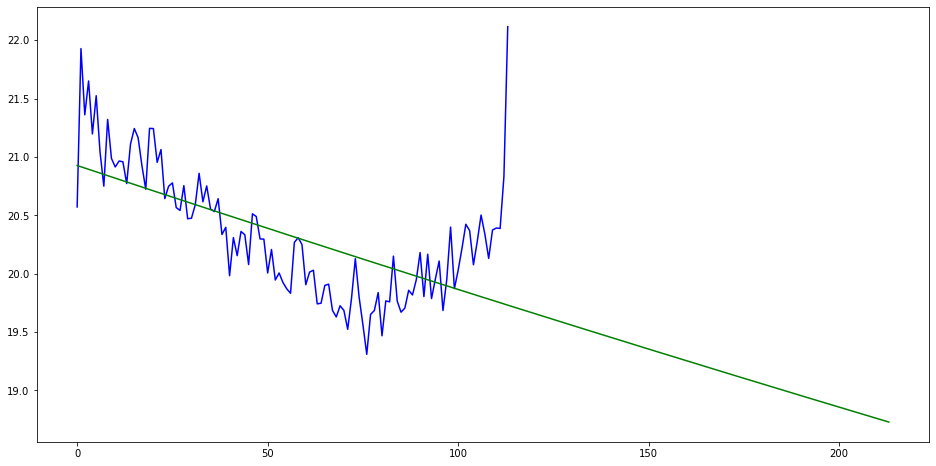

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(global_temp)), global_temp, color='b')
plt.plot(np.arange(len(pre)), pre, color='g')
plt.show()

In [67]:
cancha = pd.read_csv('./data/残差预测.csv')['预测结果'].to_numpy()
cancha

array([ 1.72951953,  1.64719279,  1.81919773,  2.0233526 ,  2.02618953,
        2.07025144,  2.16123819,  2.25438238,  2.3250673 ,  2.39960219,
        2.48211   ,  2.56593162,  2.64803849,  2.73144711,  2.81697897,
        2.90374133,  2.99132731,  3.08009294,  3.17017177,  3.26144991,
        3.35387067,  3.44747655,  3.54228764,  3.63828983,  3.73547517,
        3.83384871,  3.93341338,  4.03416745,  4.13610982,  4.23924108,
        4.34356165,  4.44907133,  4.55576994,  4.66365758,  4.7727343 ,
        4.88300006,  4.99445485,  5.10709869,  5.22093157,  5.33595349,
        5.45216445,  5.56956446,  5.6881535 ,  5.80793159,  5.92889872,
        6.0510549 ,  6.17440011,  6.29893437,  6.42465767,  6.55157001,
        6.67967139,  6.80896182,  6.93944128,  7.07110979,  7.20396734,
        7.33801394,  7.47324957,  7.60967425,  7.74728797,  7.88609073,
        8.02608253,  8.16726338,  8.30963326,  8.45319219,  8.59794016,
        8.74387718,  8.89100323,  9.03931833,  9.18882247,  9.33

In [68]:
pre[114:] = pre[114] + cancha
pre

array([20.92653843, 20.91564095, 20.90474914, 20.89386301, 20.88298254,
       20.87210774, 20.8612386 , 20.85037513, 20.83951731, 20.82866514,
       20.81781863, 20.80697776, 20.79614254, 20.78531296, 20.77448902,
       20.76367072, 20.75285805, 20.74205101, 20.7312496 , 20.72045382,
       20.70966365, 20.69887911, 20.68810018, 20.67732687, 20.66655916,
       20.65579706, 20.64504057, 20.63428968, 20.62354438, 20.61280469,
       20.60207058, 20.59134206, 20.58061914, 20.56990179, 20.55919003,
       20.54848384, 20.53778323, 20.52708819, 20.51639873, 20.50571482,
       20.49503649, 20.48436371, 20.47369649, 20.46303482, 20.45237871,
       20.44172815, 20.43108313, 20.42044366, 20.40980972, 20.39918133,
       20.38855847, 20.37794114, 20.36732934, 20.35672306, 20.34612231,
       20.33552708, 20.32493737, 20.31435317, 20.30377448, 20.2932013 ,
       20.28263363, 20.27207146, 20.26151479, 20.25096362, 20.24041795,
       20.22987776, 20.21934307, 20.20881386, 20.19829013, 20.18

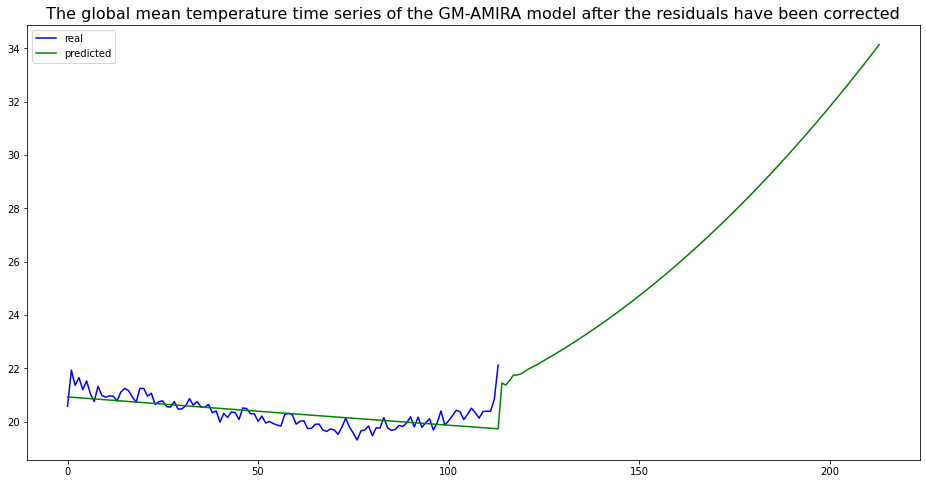

In [69]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(global_temp)), global_temp, color='b', label="real")
plt.plot(np.arange(len(pre)), pre, color='g', label="predicted")
plt.legend()
plt.title('The global mean temperature time series of the GM-AMIRA model after the residuals have been corrected', fontsize=16)
plt.savefig('The global mean temperature.png', transparent=None, facecolor='w')
plt.show()

In [88]:
date = np.arange(1900, 2114, 1)
date = pd.DataFrame(date)
date.loc[date[0]==2100].index

Int64Index([200], dtype='int64')

In [89]:
pre[200]

31.803299934593404

In [70]:
pd.DataFrame(pre).to_csv('./data/predict.csv', index=False)

In [71]:
pd.DataFrame(epsilon).to_csv('./data/epsilon.csv')

In [72]:
pd.DataFrame(np.array(epsilon_absolute)).to_csv('./data/epsilon_absolute.csv', index=False)

In [73]:
mean_epsilon = np.array(epsilon_absolute).mean()
mean_epsilon

1.5744438147383713

1.556%小于20%，说明残差拟合效果非常不错

In [74]:
sita = []
yita = []
for i in range(len(global_temp)):
    if i+1 < len(global_temp):
        sita.append(global_temp[i+1] / global_temp[i])

for i, sitak in enumerate(sita):
    yita.append(np.absolute(1-(1-0.5*a_hat)/((1+0.5*a_hat)*sitak)))

yita = np.array(yita)
yita_mean = yita.mean()
yita_mean

0.011070351508234148

为0.01，说明对原数据的拟合效果非常不错